In [52]:
import anuga
from osgeo import gdal
from glob import glob
from affine import Affine

In [44]:
import geopandas as gpd

In [45]:
bounding_polygon= gpd.read_file('area/domain.shp')

# Elevation Data
topography_file = 'DEM.tif'

# Resolution for most of the mesh
base_resolution = 80.0  # m^2


Figure files for each frame will be stored in _plot


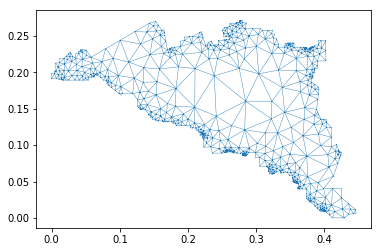

In [46]:
domain = anuga.create_domain_from_regions(
            list(bounding_polygon.exterior[0].coords),
            boundary_tags={'bottom': [0],},
            maximum_triangle_area=base_resolution,
            )

domain.set_name('excessive_rain') # Name of sww file
dplotter = anuga.Domain_plotter(domain)  
plt.triplot(dplotter.triang, linewidth = 0.4);

In [47]:
from osgeo import gdal

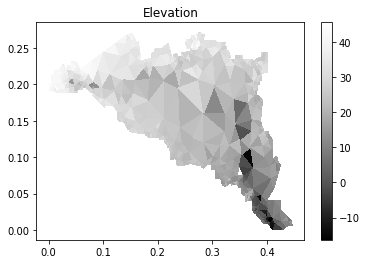

In [48]:
domain.set_quantity('elevation', filename=topography_file, location='centroids') # Use function for elevation
domain.set_quantity('friction', 0.01, location='centroids')                        # Constant friction 
domain.set_quantity('stage', expression='elevation', location='centroids')         # Dry Bed 

plt.tripcolor(dplotter.triang, 
              facecolors = dplotter.elev, 
              cmap='Greys_r')
plt.colorbar();
plt.title("Elevation");

In [49]:
Br = anuga.Reflective_boundary(domain)
Bt = anuga.Transmissive_boundary(domain)

domain.set_boundary({'bottom':   Bt,
                     'exterior': Br})

In [50]:
coords= list(bounding_polygon.exterior[0].coords)